##Análisis de Datos con Python, UNSAM 2018, Guía 3.

Defina un DataFrame **df** a partir de los datos del archivo *SAmericaFruitProd.csv* e importe las librerías a utilizar (plt,sns,np,pd). Use el comando **%matplotlib inline ** para que los plors del notebook sea *inline*

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

df = pd.read_csv("SAmericaFruitProd.csv",  encoding = "ISO-8859-1")

df.head()

ModuleNotFoundError: No module named 'seaborn'

Generar un nuevo dataframe, **data_arg**, con los datos de argentina (usar una copia y no un alias)

In [2]:
data_arg=df[df['Country']=='Argentina'].copy()

tirar la columna (irrelevante) 'Country' de **data_arg**

In [3]:
data_arg.drop('Country',axis=1,inplace=True)

genere una Serie **mand** a partir de la columna *Mandarins* de **data_arg**

In [4]:
mand=data_arg.Mandarins
mand.head()

0    196000
1    166000
2    195000
3    187200
4    101000
Name: Mandarins, dtype: int64

usar la columna 'Year' como indice de data_arg (ver método set_index, estudiar la opción modificador inplace)

In [5]:
data_arg.set_index('Year',inplace=True)

genere la Serie **mand** nuevamente. Qué diferencia hay en los índices? Trabaje con esta última Serie

In [6]:
mand=data_arg.Mandarins
mand.head()

Year
Y1961    196000
Y1962    166000
Y1963    195000
Y1964    187200
Y1965    101000
Name: Mandarins, dtype: int64

plotée la produccion de mandarinas en argentina

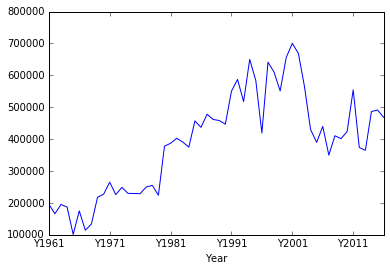

In [7]:
mand.plot()

Use los métodos argmax y max para determinar la cantidad y el año en que la producción de mandarina fue máxima en Argentina y cuál fue su cantidad.

In [8]:
print("El máximo se alcanzó en el año", mand.argmax()[1:], "y fue de", mand.max(), "toneladas.")
print("El mínimo se alcanzó en el año", mand.argmin()[1:], "y fue de", mand.min(), "toneladas.")



El máximo se alcanzó en el año 2001 y fue de 700404 toneladas.
El mínimo se alcanzó en el año 1965 y fue de 101000 toneladas.


seleccione las filas de correspondientes a la década del '70 y calcule la producción media de eta década

In [9]:
mand.loc['Y1970':'Y1979'].mean()

238440.0

calcule la producción media de cada década y plotée los datos obtenidos (puede ser tedioso)



#volvamos a trabajar con el dataframe data_arg
plotear las 7 series de datos de Argentina en un solo grafico

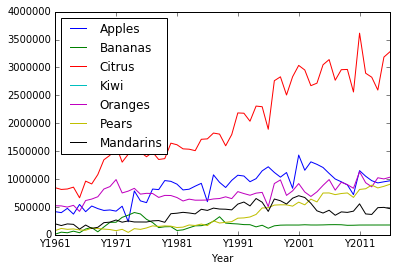

In [10]:
data_arg.plot()

realizar un scatterplot de la produccion de 'pears' vs 'citrus'

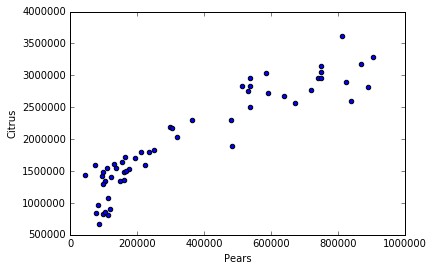

In [11]:
data_arg.plot.scatter('Pears','Citrus')

determinar la producción media de cada fruta durante la década del '70 

In [12]:
data_arg['Y1970':'Y1979'].mean()

Apples        618700.0
Bananas       265660.0
Citrus       1439082.7
Kiwi               0.0
Oranges       780840.0
Pears         110935.0
Mandarins     238440.0
dtype: float64

#volvamos a trabajar con el dataframe completo, df

Genere un nuevo dataframe, **dM**, que contenga la produccion de mandarinas de todos los países, seteando el índice adecuadamente 

In [13]:
dM=df[['Country','Mandarins']].copy()
dM.index=df.Year
dM.head()

,Country,Mandarins
Year,,
Y1961,Argentina,196000
Y1962,Argentina,166000
Y1963,Argentina,195000
Y1964,Argentina,187200
Y1965,Argentina,101000


realice un boxplot comparando las magnitudes de producción de mandarinas de cada país

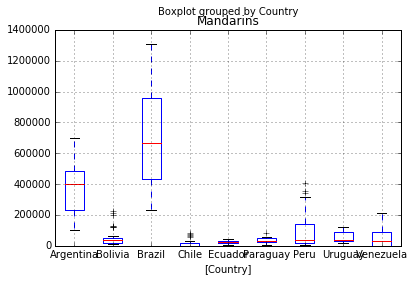

In [14]:
dM.boxplot(by='Country')

compare la producción de Citrus por país con un boxplot un swarmplot y un violinplot (seaborn)

In [2]:
plt.figure()
sns.swarmplot(x=df.Country, y=df.Mandarins)
plt.figure()
sns.violinplot(x=df.Country, y=df.Mandarins)
plt.figure()
sns.boxplot(x=df.Country, y=df.Mandarins)


NameError: name 'plt' is not defined

Defina el conjunto Países y Years, usando el método unique() y el dataframe **dM**

In [1]:
Paises = dM.Country.unique()
Years=[int(Y[1:]) for Y in dM.index.unique()]
print('Paises:',Paises,'\n\nAños:', Years)


NameError: name 'dM' is not defined

utilice estos conjuntos para plotear la producción de Mandarins a lo largo de los años para todos los paises en un solo gráfico

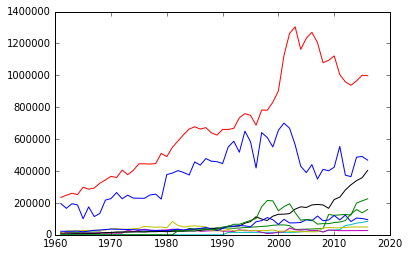

In [17]:
plt.clf()
for pais in Paises:
    plt.plot(Years,df[df['Country']==pais].Mandarins.values)

##------------------------------------------------------------------------------------------------------
Volvamos a trabajar con **FAO.csv**, el archivo que usamos en la *Parte 3* de la clase como ejemplo.

En este ejercicio vamos a plotear la produccion de soja desde 1961 hasta 2016 de los 10 paises que mas produjeron en el periodo

Abrir el archivo en un DataFrame **df**

In [18]:
df = pd.read_csv("~/Downloads/Production_Crops_E_All_Data.csv",  encoding = "ISO-8859-1")

Armar un df df_soy_prod que tenga solo las filas de df con 'Element'=='Production' & 'Item'=='Soybeans'

In [19]:
df_soy_prod = df[(df['Element']=='Production') & (df['Item']=='Soybeans')]

Cuales son las columnas de este nuevo df? Use el método describe para inspeccionar **df**

In [20]:
print(df_soy_prod.describe())
df_soy_prod.columns

         Area Code  Item Code  Element Code            Y1961            Y1962  \
count   140.000000        140           140        77.000000        76.000000   
mean   1252.214286        236          5510   1482059.467532   1518503.302632   
std    2160.460958          0             0   4847774.713335   4876932.835686   
min       3.000000        236          5510        19.000000        20.000000   
25%      90.500000        236          5510      1000.000000      1045.750000   
50%     165.500000        236          5510      5000.000000      8152.000000   
75%     240.500000        236          5510    164836.000000    160560.250000   
max    5817.000000        236          5510  26883158.000000  27120148.000000   

                 Y1963            Y1964            Y1965            Y1966  \
count        76.000000        75.000000        75.000000        76.000000   
mean    1581268.960526   1661714.320000   1778805.813333   2031709.763158   
std     5085738.177990   5252274.530159

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1961F', 'Y1962',
       ...
       'Y2012', 'Y2012F', 'Y2013', 'Y2013F', 'Y2014', 'Y2014F', 'Y2015',
       'Y2015F', 'Y2016', 'Y2016F'],
      dtype='object', length=119)

Vamos a dar algunos pasos para armar el DataFrame adecuado, con los datos que nos resultan de interés para nuestro objetivo.
Perimero definamos year_cols=['Y'+str(y) for y in np.arange(1961,2017)], como en la clase

In [21]:
year_cols=['Y'+str(y) for y in np.arange(1961,2017)]

Observar que las primeras 110 filas corresponden a datos de paises y las siguientes a regiones.
Seleccionar solo las primeras 110 filas, correspondientes a paises

Observar que las columnas que nos interesan son *Area* y las columnas con datos de años, no las que tienen flags. Es decir, las columnas de interés están en la lista: ['Area']+year_cols donde year_cols=['Y'+str(y) for y in np.arange(1961,2017)]

De hecho, una vez seleccionadas estas filas y columnas, podemos definir 'Area' como el *index* del nuevo DataFrame

In [22]:
df_soy_prod_country = df_soy_prod[['Area']+['Y'+str(y) for y in np.arange(1961,2017)]].iloc[:110].copy()
df_soy_prod_country.index=df_soy_prod_country.Area
df_soy_prod_country.drop('Area',axis=1,inplace=True)
df_soy_prod_country.head()


,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
Area,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,400,600,500,500,600,400,300,350,500,664
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7064,14711,5936,6087,7743,5898,10326,13763,14835,15160
Argentina,957,11220,18920,14000,17000,18200,20500,22000,31800,26800,...,47482784,46238088,30993380,52675464,48888536,40100196,49306200,53397715,61398276,58799258
Australia,200,260,599,748,1112,770,775,887,1740,5028,...,25907,34700,80105,59600,29750,86100,91800,80000,63646,62556
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52902,54095,71333,94544,109378,104143,82780,118132,136195,152599


Finalmente, observar también el dataframe resultante tiene las series de producción por pais en las filas y no en las columnas. Luego, trasponerlo y guardarlo en df_soy_prod_country

In [23]:
df_soy_prod_country = df_soy_prod_country.T
df_soy_prod_country.head()

Area,Albania,Angola,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belize,Benin,Bhutan,...,Ukraine,United Republic of Tanzania,United States of America,Uruguay,USSR,Venezuela (Bolivarian Republic of),Viet Nam,Yugoslav SFR,Zambia,Zimbabwe
Y1961,NaN,NaN,957,200,NaN,NaN,NaN,350,NaN,NaN,...,NaN,2600,18468000,1000,344000,NaN,14100,9840,NaN,472
Y1962,NaN,NaN,11220,260,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2200,18213008,1000,475000,NaN,13000,7920,NaN,581
Y1963,NaN,NaN,18920,599,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4000,19028000,1000,445000,NaN,12000,7000,NaN,281
Y1964,NaN,NaN,14000,748,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1700,19076000,1000,285000,NaN,14000,9560,NaN,181
Y1965,NaN,NaN,17000,1112,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1200,23014000,1000,421000,NaN,15200,9660,NaN,167


sumar las series para obtener la produccion total por país.
Ordenar estos valores y quedarse con los 10 países que más produjeron.


In [24]:
topten=df_soy_prod_country.sum().sort_values(ascending=False)[:10].index

plotear la produccion de soja año a año de estos diez países

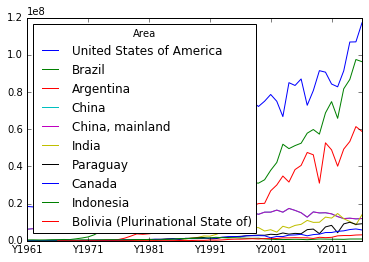

In [25]:
df_soy_prod_country[topten].plot()